In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from numpy.polynomial.polynomial import Polynomial

In [3]:
poly = Polynomial([1,0,0,0,0,1])

In [9]:
der = poly.deriv()
der

Polynomial([ 0.,  0.,  0.,  0.,  5.], [-1.,  1.], [-1.,  1.])

In [11]:
der(1)
x = np.array([1,2,3])
der(x)

array([   5.,   80.,  405.])

In [12]:
poly.roots()

array([-1.00000000+0.j        , -0.30901699-0.95105652j,
       -0.30901699+0.95105652j,  0.80901699-0.58778525j,
        0.80901699+0.58778525j])

In [13]:
def dist(roots,point):
    return np.abs(roots-point)

In [27]:
dists = dist(poly.roots(),x[:,np.newaxis])
np.min(dists, axis = 1)
np.argmin(dists, axis = 1 )

array([3, 3, 3], dtype=int64)

In [16]:
def get_delta(poly,deriv,point):
    return -poly(point)/deriv(point)

In [89]:
get_delta(poly,der,x)

array([-0.4       , -0.4125    , -0.60246914])

In [103]:
dists = grid[:,:,newaxis]
dists
dists = dists - poly.roots()
np.argmin(dists, axis = 2)

array([[4, 4, 4],
       [4, 4, 4]], dtype=int64)

In [143]:
grid = np.array([[2.,3.,4.],[1.,-2.,3.]])
print "initial dat", grid
done = np.ones_like(grid)
print "is done", done
count = np.zeros_like(grid)
print "amout of iterations", count
num = 0
print "roots", poly.roots()

initial dat [[ 2.  3.  4.]
 [ 1. -2.  3.]]
is done [[ 1.  1.  1.]
 [ 1.  1.  1.]]
amout of iterations [[ 0.  0.  0.]
 [ 0.  0.  0.]]
roots [-1.00000000+0.j         -0.30901699-0.95105652j -0.30901699+0.95105652j
  0.80901699-0.58778525j  0.80901699+0.58778525j]


In [218]:

dists = np.abs(grid[:,:,newaxis]-poly.roots())
print "distances from roots"
print dists
mins = np.min(dists,axis=2)< 1e-5
print "minimum dostances"
print mins
done[mins] = 0
print "some are done?"
print done
grid[done == 1] += get_delta(poly,der,grid[done == 1])
print "grid updated"
print grid
count[~mins] = num
print "update count on not done"
print count[mins]
num+=1
print "which is the closes to current solution?"
print np.argmin(dists,axis=2)

distances from roots
[[[  9.24375515e-08   1.17557056e+00   1.17557056e+00   1.90211312e+00
     1.90211312e+00]
  [  2.02191985e-09   1.17557051e+00   1.17557051e+00   1.90211303e+00
     1.90211303e+00]
  [  1.06889660e-06   1.17557113e+00   1.17557113e+00   1.90211405e+00
     1.90211405e+00]]

 [[  1.95630175e-08   1.17557052e+00   1.17557052e+00   1.90211305e+00
     1.90211305e+00]
  [  2.28289696e-06   1.17557185e+00   1.17557185e+00   1.90211520e+00
     1.90211520e+00]
  [  2.02191985e-09   1.17557051e+00   1.17557051e+00   1.90211303e+00
     1.90211303e+00]]]
minimum dostances
[[ True  True  True]
 [ True  True  True]]
some are done?
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
grid updated
[[-1.00000009 -1.         -1.00000107]
 [-1.00000002 -1.00000228 -1.        ]]
update count on not done
[ 15.  27.  15.   4.   5.  27.]
which is the closes to current solution?
[[0 0 0]
 [0 0 0]]


In [268]:
def newton_matrix(poly,deriv,roots,grid,max_num=20,tolerance=1e-5):
    done = np.ones_like(grid)
    count = np.zeros_like(grid, dtype = float32)
    num = 0
    while np.sum(done) != 0 and num < max_num:
        dists = np.abs(grid[:,:,newaxis]-roots)
        mins = np.min(dists,axis=2)<tolerance
        done[mins] = 0
        grid[done == 1] += get_delta(poly,der,grid[done == 1])
        count[~mins] = num
        num+=1
    dists = np.abs(grid[:,:,newaxis]-roots)
    root = np.argmin(dists,axis=2)
    return count, root

In [269]:
count, root  = newton_matrix(poly,der,poly.roots(),np.array([[1.,2.+2j,3.],[-3.+1j,1.-3j,2.]]),max_num=20,tolerance=1e-3)

colors = np.array(
            [[200.,0.,100.],
             [100.,200.,0.],
             [100.,0.,200.],
             [200.,100.,0.],
             [0.,200.,100.]])
colors[root]

array([[[ 200.,    0.,  100.],
        [   0.,  200.,  100.],
        [ 200.,    0.,  100.]],

       [[ 200.,    0.,  100.],
        [ 100.,    0.,  200.],
        [ 200.,    0.,  100.]]])

In [298]:
def get_image(poly,deriv=None,roots=None,size = 200,rang = 2., colors = None, center = (0.,0.), rotation = 0.0, printing = False):

    if colors is None:
        colors = np.array(
            [[200.,0.,100.],
             [100.,200.,0.],
             [100.,0.,200.],
             [200.,100.,0.],
             [0.,200.,100.]])
    
    if deriv is None:
        deriv = poly.deriv()
    
    
    if roots is None:
        roots = poly.roots()

    grid = np.mgrid[0:size,0:size]/float(size)*rang - rang/2
    grid[0] += center[1]
    grid[1] += center[0]
    
    grid = grid[0] + 1j * grid[1]
    grid *= (sin(rotation) + 1j * cos(rotation))
    
    darken, color = newton_matrix(poly,deriv,roots,grid)
             
    img = colors[color] - darken[:,:,newaxis]*5.
    return img

d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning: invalid value encountered in less


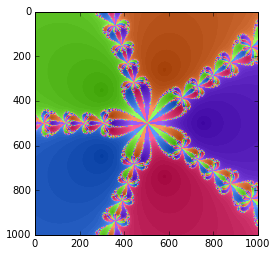

In [299]:
size = 1000
img = get_image(poly, size = size, rang=4., center = (0,0), rotation= 0, printing = True)
imshow(img)
name = "obrazek {0:d}"
imsave(name.format(size),img)

In [302]:
def save_animation(poly,size,move_x,move_y,zoom,rotation,steps,stepsize):
    deriv = poly.deriv()
    roots = poly.roots()
    t = 0.0
    for i in range(steps):
        z = zoom(t)
        x = move_x(t)
        y = move_y(t)
        r = rotation(t)
        print "Generating image ", i
        img = get_image(poly,deriv = deriv, roots = roots, size = size, rang = z, center = (x,y), rotation = r, printing = True)
        imsave('anim_{0:02d}'.format(i),img)
        t += stepsize

In [303]:
save_animation(poly,
               256,
               lambda x: sin(x),
               lambda x: cos(x),
               lambda x: sin(x)+2,
               lambda x: x/(2.0*3.14),
               steps = 100, stepsize = 2*3.14/100)

d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app
d:\anac\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning: invalid value encountered in less


Generating image  0
Generating image  1
Generating image  2
Generating image  3
Generating image  4
Generating image  5
Generating image  6
Generating image  7
Generating image  8
Generating image  9
Generating image  10
Generating image  11
Generating image  12
Generating image  13
Generating image  14
Generating image  15
Generating image  16
Generating image  17
Generating image  18
Generating image  19
Generating image  20
Generating image  21
Generating image  22
Generating image  23


KeyboardInterrupt: 